<a href="https://colab.research.google.com/github/Pumafi/geostats_deep_learning/blob/main/TP_Intro_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

### **Keras**

Keras is a high level Deep Learning Python library.

The main idea behind the Keras Deep Learning lib is that a deep learning model is usually a **directed acyclic graph (DAG) of layers**.

Using the different available API, you will be able to build those *graphs of layers.*

#### Layers



##### Fully Connected Layers

In [2]:
!keras.layers.Dense?

In [4]:
output_size=128
activation='sigmoid'

fc = # TODO: insert the creation of a Dense layer here

fc = keras.layers.Dense(output_size, activation=activation, use_bias=True)

##### Convolutional Layers

In [5]:
!keras.layers.Conv2D?

In [6]:
output_features=128
kernel_size=(3, 3)
activation='sigmoid'

conv = # TODO: insert the creation of a Conv layer here

conv = keras.layers.Conv2D(output_features, kernel_size, activation=activation, use_bias=True)

#### Functional API

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API.

The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

To demonstrate consider the following code, defining a very simple Fully Connected model.

In [10]:
inputs = keras.Input(shape=(50,))

# In the Fonctional API, the next layer is defined using LayerClass(*args)(last_layer_outputs)
y = keras.layers.Dense(128, activation="sigmoid", name="layer1")(inputs)
outputs = keras.layers.Dense(32, activation="softmax", name="output")(y)

At this point you can create the Model by specifying the inputs and outputs in the graph of layers


In [8]:
!keras.Model?

In [11]:
model = keras.Model(inputs=inputs, outputs=outputs, name="model")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 layer1 (Dense)              (None, 128)               6528      
                                                                 
 output (Dense)              (None, 32)                4128      
                                                                 
Total params: 10,656
Trainable params: 10,656
Non-trainable params: 0
_________________________________________________________________


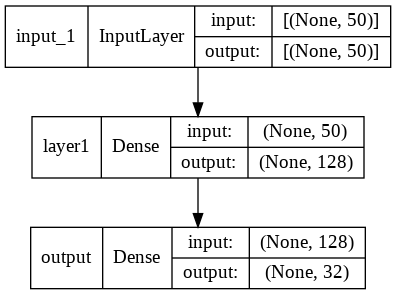

In [12]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Sequential API

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Let's define the same model as before but using this new API.

In [9]:
!keras.Sequential?

In [13]:
# Define Sequential model with 2 layers
model = keras.Sequential(
    [
        keras.layers.Dense(128, activation="sigmoid", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 50))
y = model(x)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (1, 128)                  6528      
                                                                 
 output (Dense)              (1, 32)                   4128      
                                                                 
Total params: 10,656
Trainable params: 10,656
Non-trainable params: 0
_________________________________________________________________


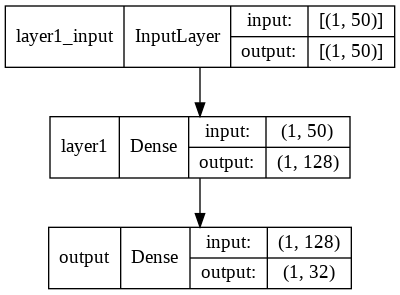

In [15]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Exercise 1 : Simple Feed Forward Network

Create a simple feed forward that takes a flattened MNIST input (28x28) and outputs the classification vector.

It should have one hidden layer with 100 neurons and a tanh output, and a Dense output layer with a softmax activation.

In [18]:
# TODO: Put your code here
# Define Sequential model with those 2 layers

model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)

# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

# TODO: end

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (1, 100)                  78500     
                                                                 
 output (Dense)              (1, 32)                   3232      
                                                                 
Total params: 81,732
Trainable params: 81,732
Non-trainable params: 0
_________________________________________________________________


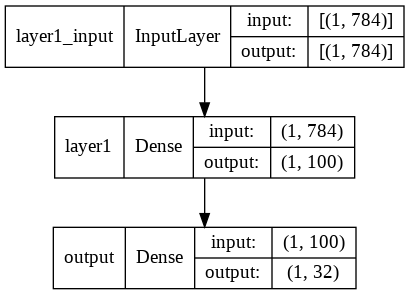

In [20]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Training

First we need to load some data to train our model with

In [21]:
# Loading the Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


#### Compiling the Model

To train a model with fit(), you need to specify a **loss function, an optimizer, and optionally, some metrics to monitor**.

You pass these to the model as arguments to the [compile](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class)() method.

*   The loss argument is a callable with arguments loss_fn(y_true, y_pred,sample_weight=None). The compile function can also accept some defined string arguments such as: "*mean_absolute_error*", "*mean_squared_error*", "*binary_crossentropy*"...
*   Similarly, the optimizer argument can also accept "*adam*", "*sgd*"...
*   The metrics argument should be a list -- your model can have any number of metrics.


In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3547 - accuracy: 0.9016 - val_loss: 0.2195 - val_accuracy: 0.9384
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1926 - accuracy: 0.9435 - val_loss: 0.1661 - val_accuracy: 0.9539
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1433 - accuracy: 0.9575 - val_loss: 0.1356 - val_accuracy: 0.9622
Epoch 4/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9668 - val_loss: 0.1235 - val_accuracy: 0.9644
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0959 - accuracy: 0.9723 - val_loss: 0.1095 - val_accuracy: 0.9697
Epoch 6/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0819 - accuracy: 0.9770 - val_loss: 0.1039 - val_accuracy: 0.9698
Epoch 7/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9796 - val_loss: 0.0964 - val_accuracy:

Let's visualise the convergence

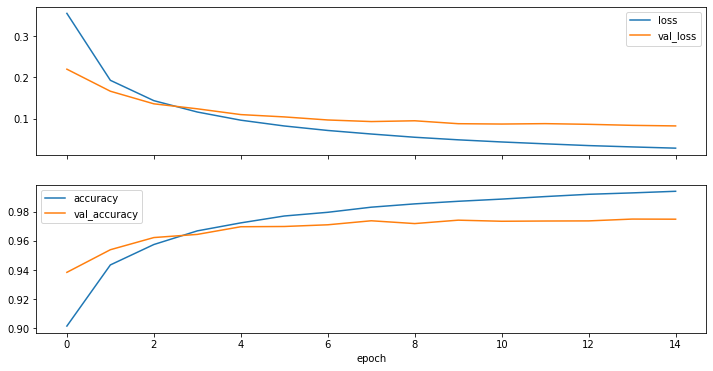

In [24]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [25]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0721 - accuracy: 0.9765 - 654ms/epoch - 2ms/step
Test loss: 0.07213345170021057
Test accuracy: 0.9764999747276306


#### Exercise 2 : Impact of the Optimiser



1.   Try replacing the value of the learning rate by 0.01 or 0.001. What happens ?
2.   Try increasing the learning rate until the model diverge. At what lr does the model diverge ?
3.   Try adding Nesterov Momentum with a value of 0.8 to SGD. How many epochs does it need to converge ?



In [23]:
!keras.optimizers.SGD?

Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 2.1311 - accuracy: 0.5136 - val_loss: 1.4142 - val_accuracy: 0.7463
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1778 - accuracy: 0.7677 - val_loss: 0.9458 - val_accuracy: 0.8152
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.8744 - accuracy: 0.8136 - val_loss: 0.7446 - val_accuracy: 0.8440
Epoch 4/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7263 - accuracy: 0.8378 - val_loss: 0.6352 - val_accuracy: 0.8594
Epoch 5/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6384 - accuracy: 0.8521 - val_loss: 0.5664 - val_accuracy: 0.8697
Epoch 6/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5797 - accuracy: 0.8606 - val_loss: 0.5191 - val_accuracy: 0.8767
Epoch 7/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5374 - accuracy: 0.8673 - val_loss: 0.4845 - val_accuracy:

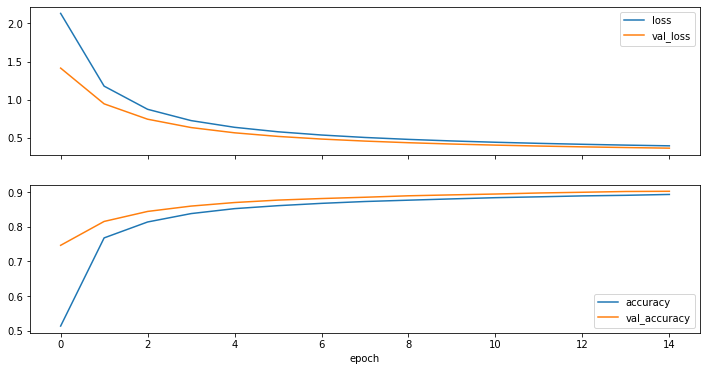

In [26]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=.001),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

Epoch 1/15
1500/1500 [==============================] - 4s 2ms/step - loss: 229.8721 - accuracy: 0.2153 - val_loss: 197.8063 - val_accuracy: 0.2973
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 193.5597 - accuracy: 0.2500 - val_loss: 269.1429 - val_accuracy: 0.2742
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 220.9045 - accuracy: 0.2195 - val_loss: 127.8199 - val_accuracy: 0.3206
Epoch 4/15
1500/1500 [==============================] - 4s 2ms/step - loss: 132.7827 - accuracy: 0.3074 - val_loss: 141.9136 - val_accuracy: 0.1859
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 151.4542 - accuracy: 0.2727 - val_loss: 236.9846 - val_accuracy: 0.1643
Epoch 6/15
1500/1500 [==============================] - 4s 2ms/step - loss: 181.5258 - accuracy: 0.2630 - val_loss: 249.6487 - val_accuracy: 0.2262
Epoch 7/15
1500/1500 [==============================] - 4s 2ms/step - loss: 164.7459 - accuracy: 0.2791 - val_lo

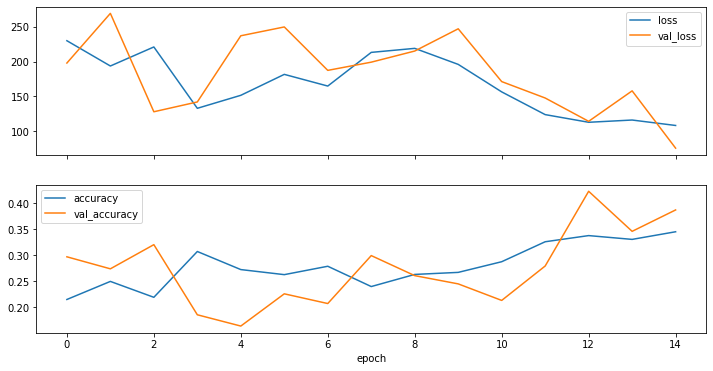

In [27]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=10.),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

Epoch 1/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2799 - accuracy: 0.9175 - val_loss: 0.1721 - val_accuracy: 0.9520
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1653 - accuracy: 0.9512 - val_loss: 0.1554 - val_accuracy: 0.9562
Epoch 3/3
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9600 - val_loss: 0.1606 - val_accuracy: 0.9580


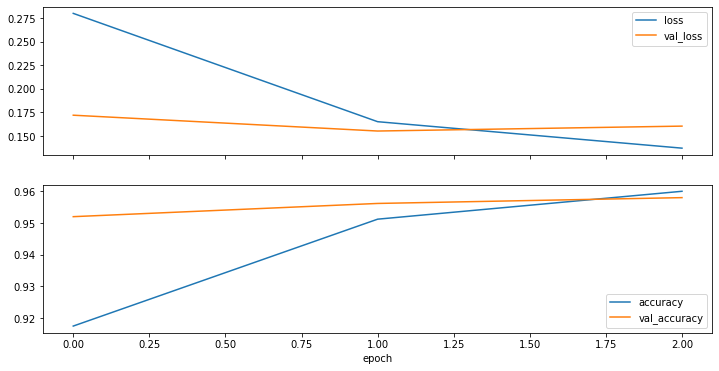

In [28]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

4. Replace SGD by Adam optimizer and run it


Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3356 - accuracy: 0.9069 - val_loss: 0.1884 - val_accuracy: 0.9463
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1581 - accuracy: 0.9534 - val_loss: 0.1405 - val_accuracy: 0.9603
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1118 - accuracy: 0.9676 - val_loss: 0.1131 - val_accuracy: 0.9668
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0843 - accuracy: 0.9759 - val_loss: 0.1143 - val_accuracy: 0.9665
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0659 - accuracy: 0.9816 - val_loss: 0.1042 - val_accuracy: 0.9684
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0524 - accuracy: 0.9855 - val_loss: 0.0960 - val_accuracy: 0.9706
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0423 - accuracy: 0.9886 - val_loss: 0.0890 - val_accuracy:

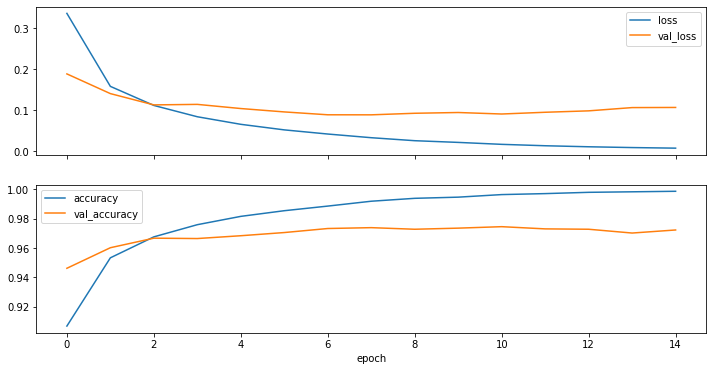

In [29]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

#### Exercise 3 : Simple MNIST LeNet (Convolutional Networks)

[Y. Lecun, 1998](https://ieeexplore.ieee.org/abstract/document/726791)

    
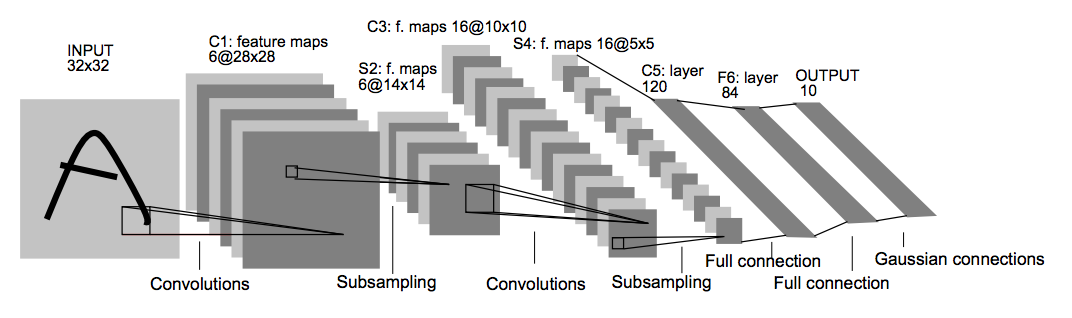




1.   Image Input: 28 (height) x 28 (width) x 1 (channel) 
2.   Convolution with 5x5 kernel + padding: 28x28x6 \[sigmoid activation\]
3.   Pooling with 2x2 average kernel: 14x14x6
4.   Convolution with 5x5 kernel (no padding): 10x10x16 \[sigmoid activation\]
5.   Pooling with 2x2 average kernel: 5x5x16
6.   Flatten
7.   Dense: 120 fully connected neurons \[sigmoid activation\]
8.   Dense: 84 fully connected neurons \[sigmoid activation\]
9.   Dense: 10 fully connected neurons \[softmax activation\]
10.  Output: 1 out of 10 classes




In [30]:
# Loading the Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [31]:
# TODO: your code goes here [You can use either API for this model]

lenet = keras.Sequential()
lenet.add(layers.Conv2D(filters=6, kernel_size=(5, 5), padding="same", activation='sigmoid', input_shape=(28, 28, 1)))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="valid", activation='sigmoid'))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(units=120, activation='sigmoid'))

lenet.add(layers.Dense(units=84, activation='sigmoid'))

lenet.add(layers.Dense(units=10, activation = 'softmax'))

# TODO: end

In [32]:
lenet.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 120)              

In [33]:
lenet.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = lenet.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 28s 36ms/step - loss: 1.1762 - accuracy: 0.6120 - val_loss: 0.3600 - val_accuracy: 0.8973
Epoch 2/2
750/750 [==============================] - 27s 36ms/step - loss: 0.2904 - accuracy: 0.9150 - val_loss: 0.2255 - val_accuracy: 0.9322


In [34]:
test_scores = lenet.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 2s - loss: 0.2260 - accuracy: 0.9324 - 2s/epoch - 7ms/step
Test loss: 0.22600500285625458
Test accuracy: 0.9323999881744385


In [35]:
y_pred=lenet(np.expand_dims(x_test[0], 0))
y_pred.shape

TensorShape([1, 10])

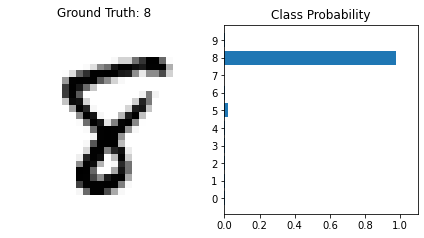

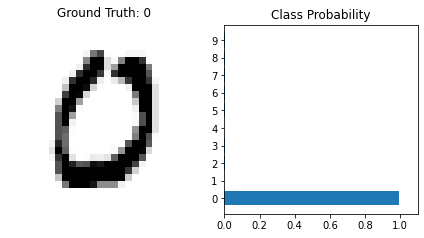

In [36]:
import random
import matplotlib.patches as patches
import tensorflow as tf

def test_model(x_test, y_test, model):
    n =  random.randint(0, x_test.shape[0])
    x = np.expand_dims(x_test[n], 0)
    y_pred=model(x)


    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.set_title('Ground Truth: {}'.format(y_test[n]))
    ax1.imshow(x_test[n], "Greys")
    ax1.axis('off')
    ax2.barh(np.arange(10), tf.squeeze(y_pred))
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

test_model(x_test, y_test, lenet)
test_model(x_test, y_test, lenet)